In [75]:
import pandas as pd
import numpy as np 
from datetime import datetime, timedelta
from calendar import monthrange
import json
import matplotlib.pyplot as plt
import seaborn as sns

1. https://www.federalreserve.gov/econres/notes/feds-notes/new-way-to-visualize-the-evolution-of-monetary-policy-expectations-20190920.html

2. https://www.atlantafed.org/cenfis/publications/notesfromthevault/1608

3. 

In [12]:
df = pd.read_csv('FFR_rates_futures.csv') 
df = df[["Day", "Rate", "PriceNextDay", "PricePrevDay", "PriceDifference", "RateDifference"]] #select only usefull cols 
df = df.drop(range(100,107)) # dropping rows with absent values (no futures data)

In [22]:
df['Day'] = df['Day'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d')) # convert day to datetime format


In [23]:
returnlist = []
for i in range(len(df['Day'])):
    if i == len(df['Day']) - 1:
        returnlist.append(1)
    else:
        value = (df['Day'][i].month - df['Day'][i+1].month)%12
        if value <= 1:
            returnlist.append(1)
        else:
            returnlist.append(2)
df['MonthType'] = pd.Series(returnlist)

In [24]:
df

,Day,Rate,PriceNextDay,PricePrevDay,PriceDifference,RateDifference,MonthType
0,2022-11-02,3.875,96.214996,96.214996,0.000000,0.75,2
1,2022-09-21,3.125,97.442497,97.432503,0.009995,0.75,2
2,2022-07-27,2.375,98.324997,98.317497,0.007500,0.75,1
3,2022-06-15,1.625,98.792503,98.809998,-0.017494,0.75,1
4,2022-05-04,0.875,99.230003,99.217499,0.012505,0.50,2
...,...,...,...,...,...,...,...
95,2001-04-18,4.500,95.184998,95.014999,0.169998,-0.50,1
96,2001-03-20,5.000,94.714996,94.735001,-0.020004,-0.50,2
97,2001-01-31,5.500,94.540001,94.019997,0.520004,-0.50,1
98,2001-01-03,6.000,93.989998,93.550003,0.439995,-0.50,1


In [29]:
df['N'] = df['Day'].apply(lambda x: monthrange(x.year, x.month)[1])
df['M'] = df['Day'].apply(lambda x: x.day -1)
df['ImpliedRate'] = df['PricePrevDay'].apply(lambda x: 100 -x)

In [30]:
df

,Day,Rate,PriceNextDay,PricePrevDay,PriceDifference,RateDifference,MonthType,N,M,ImpliedRate
0,2022-11-02,3.875,96.214996,96.214996,0.000000,0.75,2,30,1,3.785004
1,2022-09-21,3.125,97.442497,97.432503,0.009995,0.75,2,30,20,2.567497
2,2022-07-27,2.375,98.324997,98.317497,0.007500,0.75,1,31,26,1.682503
3,2022-06-15,1.625,98.792503,98.809998,-0.017494,0.75,1,30,14,1.190002
4,2022-05-04,0.875,99.230003,99.217499,0.012505,0.50,2,31,3,0.782501
...,...,...,...,...,...,...,...,...,...,...
95,2001-04-18,4.500,95.184998,95.014999,0.169998,-0.50,1,30,17,4.985001
96,2001-03-20,5.000,94.714996,94.735001,-0.020004,-0.50,2,31,19,5.264999
97,2001-01-31,5.500,94.540001,94.019997,0.520004,-0.50,1,31,30,5.980003
98,2001-01-03,6.000,93.989998,93.550003,0.439995,-0.50,1,31,2,6.449997


In [40]:
def averageoverspan(datetime1, datetime2, price_dict):
    change_dt = datetime1
    total = 0
    count = 0
    while change_dt < datetime2:
        change_str = datetime.strftime(change_dt, "%Y-%m-%d")
        if change_str in price_dict:
            total += price_dict[change_str]
            count +=1
        change_dt += timedelta(1)
    return total/count

In [35]:
with open('priceoffutures_dict.json') as json_file:
    priceoffutures_dict = json.load(json_file)

In [ ]:
expectation_df = df.copy()
returnlist = []
for i in range(len(df['Day'])):
    print(df['Day'][i], type(df['Day'][i]))
    end_dt = df['Day'][i].replace(day=1) - timedelta(1)
    beginning_dt = end_dt.replace(day=1)
    returnlist.append(100 - averageoverspan(beginning_dt, end_dt, priceoffutures_dict))
df['FFER.Start'] = pd.Series(returnlist)

In [45]:
df

,Day,Rate,PriceNextDay,PricePrevDay,PriceDifference,RateDifference,MonthType,N,M,ImpliedRate,FFER.Start
0,2022-11-02,3.875,96.214996,96.214996,0.000000,0.75,2,30,1,3.785004,3.082247
1,2022-09-21,3.125,97.442497,97.432503,0.009995,0.75,2,30,20,2.567497,2.334203
2,2022-07-27,2.375,98.324997,98.317497,0.007500,0.75,1,31,26,1.682503,1.141308
3,2022-06-15,1.625,98.792503,98.809998,-0.017494,0.75,1,30,14,1.190002,0.745875
4,2022-05-04,0.875,99.230003,99.217499,0.012505,0.50,2,31,3,0.782501,0.328674
...,...,...,...,...,...,...,...,...,...,...,...
95,2001-04-18,4.500,95.184998,95.014999,0.169998,-0.50,1,30,17,4.985001,5.286501
96,2001-03-20,5.000,94.714996,94.735001,-0.020004,-0.50,2,31,19,5.264999,5.477224
97,2001-01-31,5.500,94.540001,94.019997,0.520004,-0.50,1,31,30,5.980003,6.473422
98,2001-01-03,6.000,93.989998,93.550003,0.439995,-0.50,1,31,2,6.449997,6.473422


In [50]:



returnlist = []

for i in range(len(df['Day'])):
    N = expectation_df['N'][i]
    M = expectation_df['M'][i]
    
    value= N/(N-M) * (df['ImpliedRate'][i]- (M/N)*df['FFER.Start'][i])
    
    returnlist.append(value)
df['FFER.End'] = pd.Series(returnlist)

In [54]:
P_Hikelist = []
P_NoHikelist = []
for i in range(len(df['FFER.Start'])):
    value = (df['FFER.End'][i] - df['FFER.Start'][i])/.25
    P_Hikelist.append(value)
df['P_Hike'] = pd.Series(P_Hikelist)

In [55]:
df

,Day,Rate,PriceNextDay,PricePrevDay,PriceDifference,RateDifference,MonthType,N,M,ImpliedRate,FFER.Start,FFER.End,P_Hike
0,2022-11-02,3.875,96.214996,96.214996,0.000000,0.75,2,30,1,3.785004,3.082247,3.809237,2.907958
1,2022-09-21,3.125,97.442497,97.432503,0.009995,0.75,2,30,20,2.567497,2.334203,3.034087,2.799537
2,2022-07-27,2.375,98.324997,98.317497,0.007500,0.75,1,31,26,1.682503,1.141308,4.496715,13.421629
3,2022-06-15,1.625,98.792503,98.809998,-0.017494,0.75,1,30,14,1.190002,0.745875,1.578614,3.330955
4,2022-05-04,0.875,99.230003,99.217499,0.012505,0.50,2,31,3,0.782501,0.328674,0.831126,2.009805
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2001-04-18,4.500,95.184998,95.014999,0.169998,-0.50,1,30,17,4.985001,5.286501,4.590730,-2.783083
96,2001-03-20,5.000,94.714996,94.735001,-0.020004,-0.50,2,31,19,5.264999,5.477224,4.928978,-2.192985
97,2001-01-31,5.500,94.540001,94.019997,0.520004,-0.50,1,31,30,5.980003,6.473422,-8.822544,-61.183862
98,2001-01-03,6.000,93.989998,93.550003,0.439995,-0.50,1,31,2,6.449997,6.473422,6.448381,-0.100161


In [59]:
df['P_Hike_Normalized_Index'] = (df['P_Hike'] - np.mean(df['P_Hike'])) / np.std(df['P_Hike'])
df['Rate_Change_Normalized'] = (df['RateDifference'] - np.mean(df['RateDifference'])) / np.std(df['RateDifference'])
df['Shock_Index'] = abs(df['P_Hike_Normalized_Index'] - df['Rate_Change_Normalized'])

In [79]:
a_df = df[["Day", "Rate",  "RateDifference", "P_Hike", "P_Hike_Normalized_Index", "Rate_Change_Normalized", "Shock_Index"]]

In [ ]:
a_df['ImpliedHike'] = a_df["P_Hike"] * 0.25
a_df['Factual_V_Implied'] = a_df["RateDifference"] - a_df["ImpliedHike"]

In [82]:
a_df

,Day,Rate,RateDifference,P_Hike,P_Hike_Normalized_Index,Rate_Change_Normalized,Shock_Index,ImpliedHike,Factual_V_Implied
0,2022-11-02,3.875,0.75,2.907958,-0.043861,2.326332,2.370193,0.726989,0.023011
1,2022-09-21,3.125,0.75,2.799537,-0.044768,2.326332,2.371100,0.699884,0.050116
2,2022-07-27,2.375,0.75,13.421629,0.044130,2.326332,2.282202,3.355407,-2.605407
3,2022-06-15,1.625,0.75,3.330955,-0.040320,2.326332,2.366653,0.832739,-0.082739
4,2022-05-04,0.875,0.50,2.009805,-0.051377,1.577111,1.628488,0.502451,-0.002451
...,...,...,...,...,...,...,...,...,...
95,2001-04-18,4.500,-0.50,-2.783083,-0.091490,-1.419774,1.328284,-0.695771,0.195771
96,2001-03-20,5.000,-0.50,-2.192985,-0.086551,-1.419774,1.333223,-0.548246,0.048246
97,2001-01-31,5.500,-0.50,-61.183862,-0.580257,-1.419774,0.839517,-15.295965,14.795965
98,2001-01-03,6.000,-0.50,-0.100161,-0.069036,-1.419774,1.350738,-0.025040,-0.474960


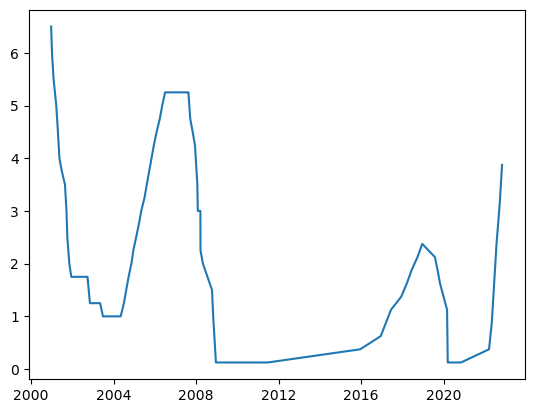

In [74]:
plt.plot(test.Day, test.Rate)

<AxesSubplot:xlabel='Day', ylabel='Rate'>

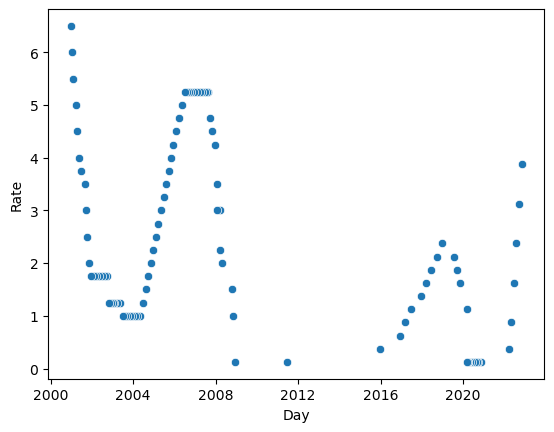

In [77]:
sns.scatterplot(x='Day', y='Rate', data=test)


<AxesSubplot:xlabel='RateDifference', ylabel='Factual_V_Implied'>

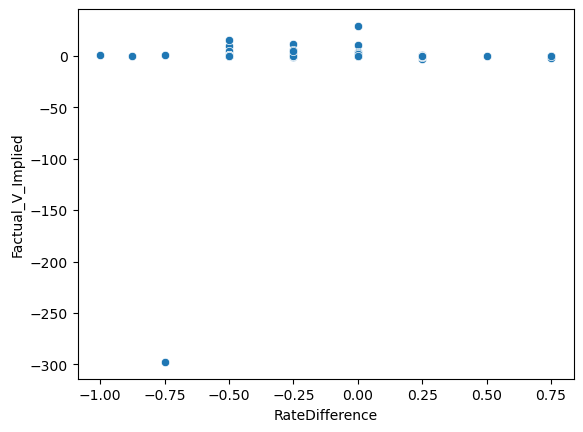

In [78]:
sns.scatterplot(x='RateDifference', y='Factual_V_Implied', data=test)
